In [50]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Github/dus_mm/')

import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
import numpy as np
import pandas as pd
import utils
import glob
from matplotlib import pyplot as plt
import seaborn as sb
os.chdir('data2')

columnsX = ['freq','AX','BX','BY','CY','CX','DX','DY','AY']
columnsY = ['AX','BX','BY','CY','CX','DX','DY','AY','AQ','AL','BQ','BL','CQ','CL','DQ','DL']
columnsYout = ['AQ','AL','BQ','BL','CQ','CL','DQ','DL','X','Y']
old_consts = [[2893.679, 2932.718],
              [150.602, 178.992],
              [184.081, 214.009],
              [217.548, 252.242],
              [236.046, 268.175],
              [247.797, 271.995],
              [255.676, 287.444],
              [138.626, 166.629],
              [0.0, 29.686],
              [16.75, 42.152],
              [22.811, 57.868],
              [0.022, 33.884],
              [0.024, 31.756],
              [0.034, 32.441]]
              

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
X = pd.DataFrame()
y = pd.DataFrame()
numb_files = len(glob.glob('data_output*'))
for numb in range(1, numb_files + 1): 
    if (numb == 'data_output.txt'):
        numb = ''
    y = pd.concat([y,pd.read_table(os.path.join('data_output%s.txt' % numb), header = 0, names = columnsY, 
                                   index_col = False, sep='\s+', engine='python', dtype ='float')], ignore_index = 1)
    X = pd.concat([X,pd.read_table(os.path.join('data_input%s.txt' % numb), header = 0, names = columnsX, 
                                   index_col = False, sep='\s+', engine='python', dtype ="float")], ignore_index = 1)
y1 = y.copy()
nelem = 64
nmode = 8

X, new_consts = utils.init_in(X, nmode, old_consts)
y = utils.decomposition(y)

drop_ind = y1.loc[(y1 > nelem).any(axis = 1)].index
drop_ind.append(y[y.duplicated()].index)
drop_ind.append(y[np.sum(y1, axis = 1) - np.sum(np.abs(y), axis = 1) > 0].index)
X = X.drop(drop_ind).reset_index(drop=True)
y = y.drop(drop_ind).reset_index(drop=True)
X = np.abs(X)

In [ ]:
drop_ind = y1.loc[(y1 > nelem).any(axis = 1)].index
drop_ind.append(y[y.duplicated()].index)
drop_ind.append(y[np.sum(y1, axis = 1) - np.sum(np.abs(y), axis = 1) > 0].index)
X = X.drop(drop_ind).reset_index(drop=True)
y = y.drop(drop_ind).reset_index(drop=True)

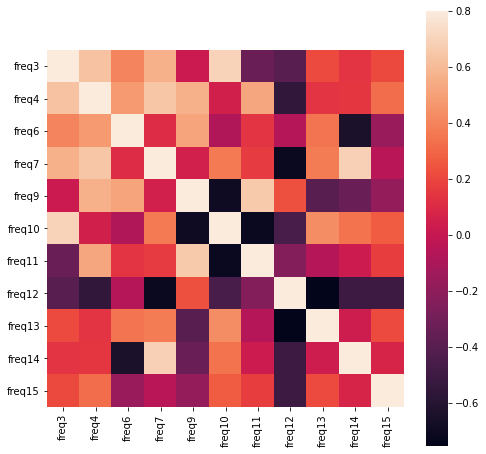

In [ ]:
#train_examples = pd.concat([X],axis = 1)
#train_examples = X[['freq3','freq4','freq5','freq6','freq7','freq8']]
train_examples2 = X[['freq3','freq4','freq6','freq7','freq9','freq10','freq11','freq12','freq13','freq14','freq15']]
C_mat = train_examples2.corr()
fig = plt.figure(figsize = (8,8))
#X1 = X.drop(columns = ['freq3'])
sb.heatmap(C_mat, vmax = .8, square = True)

In [ ]:
y1 = y.copy()
X1 = X.copy()

In [ ]:
X = X.drop(columns = 'freq5')

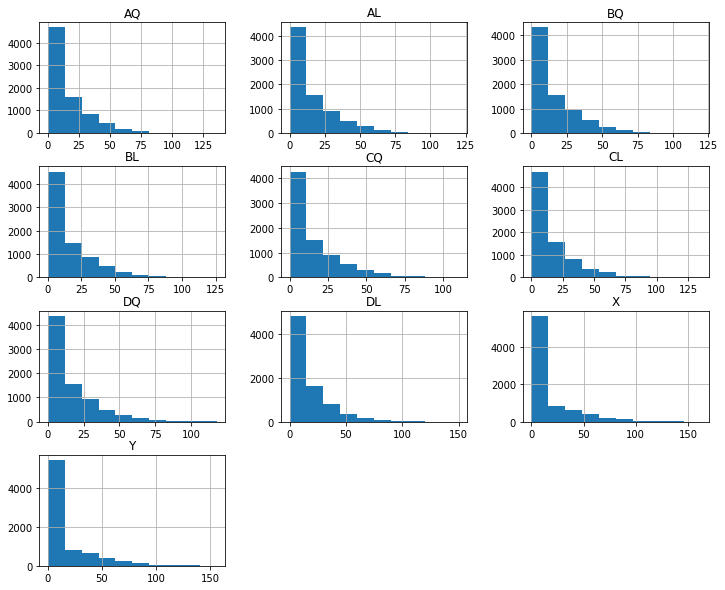

In [ ]:
y.hist(figsize = (12,10))
plt.show()

In [27]:
def mse_multi(y_true, y_pred):
    return np.mean(np.sum(np.abs(y_pred - y_true), axis = 1))

NN_model = Sequential()
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = 56, activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(10, kernel_initializer='normal',activation='linear'))
NN_model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mean_squared_error'])
NN_model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               7296      
_________________________________________________________________
dense_9 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 341,130
Trainable params: 341,130
Non-trainable params: 0
_________________________________________________________________


In [28]:
NN_model.fit(X, y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list, shuffle = True)

Epoch 1/500
197/197 [==============================] - 2s 6ms/step - loss: 368.4608 - mean_squared_error: 368.4608 - val_loss: 122.2133 - val_mean_squared_error: 122.2133

Epoch 00001: val_loss improved from inf to 122.21326, saving model to Weights-001--122.21326.hdf5
Epoch 2/500
197/197 [==============================] - 1s 4ms/step - loss: 94.3969 - mean_squared_error: 94.3969 - val_loss: 64.6484 - val_mean_squared_error: 64.6484

Epoch 00002: val_loss improved from 122.21326 to 64.64835, saving model to Weights-002--64.64835.hdf5
Epoch 3/500
197/197 [==============================] - 1s 4ms/step - loss: 51.6026 - mean_squared_error: 51.6026 - val_loss: 29.6663 - val_mean_squared_error: 29.6663

Epoch 00003: val_loss improved from 64.64835 to 29.66634, saving model to Weights-003--29.66634.hdf5
Epoch 4/500
197/197 [==============================] - 1s 4ms/step - loss: 32.4939 - mean_squared_error: 32.4939 - val_loss: 24.7859 - val_mean_squared_error: 24.7859

Epoch 00004: val_loss i

In [30]:
wights_file = 'Weights-455--1.03633.hdf5'
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mean_absolute_error'])

In [46]:
XX = pd.DataFrame()
yy = pd.DataFrame()
for numb in range(1, 4): 
    yy = pd.concat([yy,pd.read_table(os.path.join('data%s_output.txt' % numb), header = 0, names = columnsY, 
                                   index_col = False, sep='\s+', engine='python', dtype ='float')], ignore_index = 1)
    XX = pd.concat([XX,pd.read_table(os.path.join('data%s.txt' % numb), header = 0, names = columnsX, 
                                   index_col = False, sep='\s+', engine='python', dtype ="float")], ignore_index = 1)
# nelem = 64
# nmode = 8

# XX, new_consts = utils.init_in(XX, nmode, old_consts)
# yy = utils.decomposition(yy)

# predictions = NN_model.predict(XX)
# predictions = np.round(predictions)
# predictions[predictions<0] = 0
# yy_pred = pd.DataFrame(np.round(predictions), columns = columnsYout)
# mse_multi(yy, yy_pred) 

In [47]:
XX

,freq,AX,BX,BY,CY,CX,DX,DY,AY
0,3150.253,2.237,2.258,-2.267,-2.257,-2.299,-2.329,2.244,2.207
1,3317.761,-2.367,-2.426,1.743,2.237,-3.290,-2.858,1.276,1.209
2,3323.458,1.896,2.203,3.098,2.953,1.266,1.393,2.407,2.382
3,3354.161,2.249,2.543,1.424,1.666,-2.327,-1.672,-2.928,-2.943
4,3409.572,0.862,-0.767,-3.392,2.923,-2.801,3.540,-0.010,0.252
...,...,...,...,...,...,...,...,...,...
1027,4114.176,2.284,2.276,2.506,2.295,-2.128,-2.478,-2.240,-2.060
1028,4179.423,-1.786,1.308,-3.570,3.648,1.775,-2.217,-1.124,1.246
1029,4187.214,3.682,-3.565,0.005,-0.437,2.602,-2.411,-1.221,1.225
1030,4190.204,1.995,-1.998,-2.412,2.568,-1.335,0.960,3.016,-3.151


In [32]:
np.round(yy - yy_pred)

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y
0,-0.0,0.0,0.0,-0.0,0.0,-1.0,0.0,-0.0,-1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-1.0,0.0,0.0,-1.0,-1.0,-2.0,0.0,1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
124,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
125,-0.0,0.0,-1.0,2.0,-0.0,1.0,0.0,-0.0,0.0,0.0
126,0.0,-1.0,-1.0,0.0,1.0,-1.0,1.0,-1.0,3.0,0.0
127,0.0,-2.0,-0.0,0.0,0.0,-0.0,-2.0,0.0,0.0,0.0


In [ ]:
predictions = NN_model.predict(X)
yy_pred = pd.DataFrame(predictions, columns = y.columns)
mse_multi(y, yy_pred) 

15.222471630355347

In [7]:
XX.shape

(1, 56)

In [57]:
XX = pd.read_table(os.path.join('data7A-2_1.txt'), header = 0, names = columnsX, 
                                   index_col = False, sep='\s+', engine='python', dtype ='float')

nmode = 8

XX, new_consts = utils.init_in(XX, nmode, old_consts)
predictions = NN_model.predict(XX)
predictions[predictions<0] = 0
yy_pred = pd.DataFrame(np.round(predictions), columns = columnsYout)
# yy_pred[['Q','L']] = 0
# directQL_part = {'Q': [['AQ','CQ'],['BL','DL']],'L':[['AL','CL'],['BQ','DQ']]}
# yy_pred = yy_pred.apply(utils.forward, **directQL_part, axis = 1) # from component mass (Q,L) to direction (Q,L)

In [58]:
XX

,AXBX1,BYCY1,CXDX1,DYAY1,freq4,AXBX4,BYCY4,CXDX4,DYAY4,freq5,phaseA5,phaseB5,phaseC5,phaseD5,AXBX5,BYCY5,CXDX5,DYAY5,freq6,phaseA6,phaseB6,phaseC6,phaseD6,AXBX6,BYCY6,CXDX6,DYAY6,freq7,phaseA7,phaseB7,phaseC7,phaseD7,AXBX7,BYCY7,CXDX7,DYAY7,freq8,phaseA8,phaseB8,phaseC8,phaseD8,AXBX8,BYCY8,CXDX8,DYAY8,freq3,X2,Y2,phase2,freq9,freq10,freq11,freq12,freq13,freq14,freq15
number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.922,0.857,0.975,1.0,-0.425,1.0,0.952,0.919,0.974,-1.362,0.544,0.628,0.684,0.565,1.0,0.118,0.677,0.039,-1.005,0.198,0.953,0.123,0.727,0.701,0.436,1.0,0.222,-1.4,0.329,0.378,0.455,0.437,0.107,1.0,0.036,0.688,-0.654,0.603,0.332,0.707,0.372,0.089,0.581,0.113,1.0,-0.253,1.0,0.158,0.668,-0.481,0.795,0.063,-0.425,0.972,0.831,0.928


In [41]:
XX

,AXBX1,BYCY1,CXDX1,DYAY1,freq4,AXBX4,BYCY4,CXDX4,DYAY4,freq5,phaseA5,phaseB5,phaseC5,phaseD5,AXBX5,BYCY5,CXDX5,DYAY5,freq6,phaseA6,phaseB6,phaseC6,phaseD6,AXBX6,BYCY6,CXDX6,DYAY6,freq7,phaseA7,phaseB7,phaseC7,phaseD7,AXBX7,BYCY7,CXDX7,DYAY7,freq8,phaseA8,phaseB8,phaseC8,phaseD8,AXBX8,BYCY8,CXDX8,DYAY8,freq3,X2,Y2,phase2,freq9,freq10,freq11,freq12,freq13,freq14,freq15
number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.922,0.857,0.975,1.0,-0.425,1.0,0.952,0.919,0.974,-1.362,0.544,0.628,0.684,0.565,1.0,0.118,0.677,0.039,-1.005,0.198,0.953,0.123,0.727,0.701,0.436,1.0,0.222,-1.4,0.329,0.378,0.455,0.437,0.107,1.0,0.036,0.688,-0.654,0.603,0.332,0.707,0.372,0.089,0.581,0.113,1.0,-0.253,1.0,0.158,0.668,-0.481,0.795,0.063,-0.425,0.972,0.831,0.928


In [17]:
directQL_part = {'Q': [['AQ','CQ'],['BL','DL']],'L':[['AL','CL'],['BQ','DQ']]}
yy_pred = yy_pred.apply(utils.forward, **directQL_part, axis = 1) # from component mass (Q,L) to direction (Q,L)

In [18]:
yy_pred

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,0.0,13.0,0.0,8.0,2.0,0.0,2.0,0.0,47.0,0.0,0.0,54.0


In [ ]:
np.sum(np.abs(np.round(yy_pred - yy)))

AQ     98.0
AL    118.0
BQ     83.0
BL    103.0
CQ    103.0
CL    104.0
DQ     84.0
DL    119.0
X      82.0
Y      80.0
dtype: float64

In [ ]:
#os.chdir('/content/drive/MyDrive/Github/dus_mm/data2/')
XX = pd.read_table(os.path.join('data7A-1.txt'), header = 0, names = columnsX, index_col = False, sep='\s+', engine='python', dtype ="float")
XX = utils.init_in(XX, freq_bias)
predictions = NN_model.predict(XX)
yy = np.abs(pd.DataFrame(predictions.astype('float'), columns = columnsYout))
#yy = utils.integration(yy,0.72*1.33,1.33) # перемычки 30 мкм вместо 40 мкм 1.33

In [ ]:
1.06 1.448 nadam
1.1161.558 adam
1.227 1.715 nadam -1 layer
3.7 1.98 nadam regularization 0.01  
1.55 1.318 nadam  regularization 0.001 
1.42 1.318 nadam  regularization 0.0005
1.11 1.56  nadam  regularization 0.0001
1.09 1.373 nadam relu last layer
1.06 1.58 nadam relu last layer 16 batch
0.947 1.65 val set 0.25
1.02 1.556 x2 and y2
1.137 2.11 phase minus
1.09 1.64  y != y1 phase minus
0.97 1.65 y != y1 
1.09 1.597  drop duplicated
1.11 1.67  minus Y

In [ ]:
yy - yy_pred

,AL,AQ,BL,BQ,CL,CQ,DL,DQ,L,Q,X,Y
0,-0.237054,-3.509975,-3.606856,-0.412109,-0.531274,-3.043125,-3.443610,-0.199405,NaN,NaN,-0.090368,-0.129959
1,-9.289075,0.032489,0.182001,-9.440582,-10.020363,0.027928,-1.303129,-9.277164,NaN,NaN,0.109661,-0.030270
2,0.422630,-4.583191,-5.342661,0.382909,0.546090,-5.030077,-5.111120,0.161293,NaN,NaN,-0.041219,0.746807
3,-0.231840,-8.459305,-8.257257,-0.357964,0.088770,-8.165228,-9.174597,0.580340,NaN,NaN,0.020571,1.149105
4,-0.288677,-0.887535,-0.677876,-0.241418,-2.225645,-0.545261,-0.718208,-0.125892,NaN,NaN,0.028772,0.816539
...,...,...,...,...,...,...,...,...,...,...,...,...
124,-28.080307,0.631948,-0.617637,-26.915005,-27.835587,-0.401832,-0.907407,-28.098728,NaN,NaN,0.078167,-2.292007
125,-0.284360,-6.664089,-9.130745,0.330587,0.018501,-9.474152,-9.127288,0.097157,NaN,NaN,0.128838,1.635231
126,-13.852408,0.162653,-0.367364,-15.991016,-17.306118,0.936832,0.730886,-14.513405,NaN,NaN,-0.523758,-0.025077
127,-10.360720,-0.408547,0.845902,-11.034674,-11.984877,-0.120492,-0.135129,-10.699671,NaN,NaN,1.329590,0.057540
